In [1]:
# Para Colab:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [21]:
import pandas as pd
import os

import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity

Se evaluarán las predicciones de casos COVID-19 Colombia hechas por los estudiantes para el mes de Septiembre 2021

In [22]:
def normalized_RMSE(y,yhat):
    """Pre-procesing"""
    y, yhat = y.reshape(1,-1), yhat.reshape(1,-1)
    # ---- Se normaliza con la norma Euclideana
    y_norm, yhat_norm = preprocessing.normalize(y, norm='l2'), preprocessing.normalize(yhat, norm='l2')
    """Metric"""
    rmse = np.sqrt(mean_squared_error(y_norm, yhat_norm))
    sim = 100* (1 - rmse)
    return sim

def MAE(y,yhat):
    """Pre-procesing"""
    y, yhat = y.reshape(1,-1), yhat.reshape(1,-1)
    """Metric"""
    ae = mean_absolute_error(y, yhat, multioutput = "raw_values") # MAE elemntwise
    mae = ae / np.abs(y) #normalize
    # If is too far, set 1.0 
    mask = mae >=1
    mae[mask] = 1
    mae2 = np.mean(mae) #average mae
    sim = 100* (1 - mae2)
    return sim

def normalized_cosineSIM(y,yhat):
    """Pre-procesing"""
    y, yhat = y.reshape(1,-1), yhat.reshape(1,-1)
    # ---- Se normaliza con la norma Euclideana
    y_norm, yhat_norm = preprocessing.normalize(y, norm='l2'), preprocessing.normalize(yhat, norm='l2')
    """Metric"""
    cos_sim = cosine_similarity(y_norm,yhat_norm)[0]
    cos_sim = 100 * cos_sim[0]
    return cos_sim

def normalized_corrcoef(y,yhat):
    """Pre-procesing"""
    y, yhat = y.reshape(1,-1), yhat.reshape(1,-1)
    # ---- Se normaliza con la norma Euclideana
    y_norm, yhat_norm = preprocessing.normalize(y, norm='l2'), preprocessing.normalize(yhat, norm='l2')
    """Metric"""
#     corr_coef = 100* np.abs(np.corrcoef(y, yhat)[0,1]) #devuelve matriz correlacion, se toma posicion C0,1=C1,0
    corr_coef = 100 * np.abs(np.corrcoef(y_norm, yhat_norm)[0,1]) #devuelve matriz correlacion, se toma posicion C0,1=C1,0
    return corr_coef

def calificacion(yhat,y):
    metrics = [normalized_RMSE, MAE, normalized_cosineSIM, normalized_corrcoef]
    weights = [0.1,0.45, 0.2, 0.25]
    assert(np.sum(weights) == 1)    
    values = np.zeros(len(metrics))
    for i,metric in enumerate(metrics):
        error = metric(y,yhat)
        values[i] = error
#     print(values)
    out = np.average(values, weights = weights)    
    return out


In [23]:
# Colab:
# FOLDER_PATH = "/content/drive/MyDrive/RESEARCH/2021_Maestria/Contraprestacion_BECA_2021_1/2021-UIS-DataAnalytics-FEO/challengue1-20211/"

#Local
FOLDER_PATH = "../inputs/editedStudentsData/"
names = os.listdir(FOLDER_PATH)
names

['2172970.csv',
 '2172006_modelo.csv',
 '2160793.csv',
 '2172022.csv',
 '2170136.csv',
 '2160602_modelo.csv',
 '2171993.csv',
 '2170133.csv',
 '2170136_modelo.csv',
 '2180018.csv',
 '2163022.csv',
 '2180018_modelo.csv',
 '2172002_modelo.csv',
 '2170105.csv',
 '2170104.csv',
 '2171993_modelo.csv',
 '2180045_modelo.csv',
 '2170104_modelo.csv',
 '2180034.csv',
 '2160602.csv',
 '2172006.csv',
 '2180045.csv',
 '2172002.csv',
 '2172969.csv',
 '2180056.csv',
 '2180034_modelo.csv',
 '2172014_modelo.csv']

Datos reales tomados de:

https://ourworldindata.org/coronavirus-data?country=~COL (Buscar Daily confirmed COVID-19 cases and deaths, Colombia)

In [24]:
# real_data = pd.read_csv("/content/drive/MyDrive/RESEARCH/2021_Maestria/Contraprestacion_BECA_2021_1/2021-UIS-DataAnalytics-FEO/challengue1-20211/Evaluation/daily-covid-cases-deaths.csv")
real_data = pd.read_csv("../data/daily-covid-cases-deaths.csv")
real_data = real_data[(real_data['Code'] == 'COL') ]
real_data = real_data[(real_data['Day'] >= '2021-09-01') & (real_data['Day'] <= '2021-09-30') ]
real_muertes = real_data['Daily new confirmed deaths due to COVID-19'].values
len(real_muertes)

30

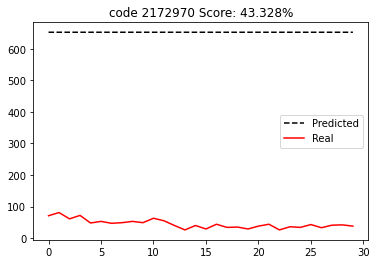

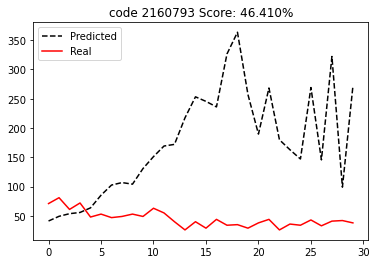

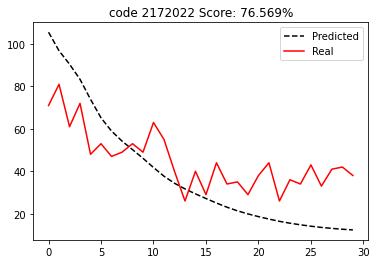

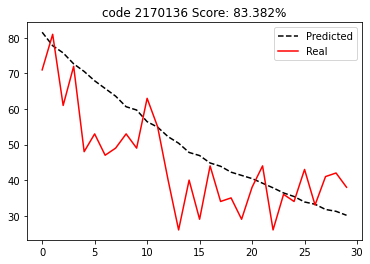

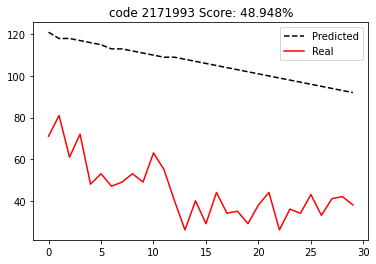

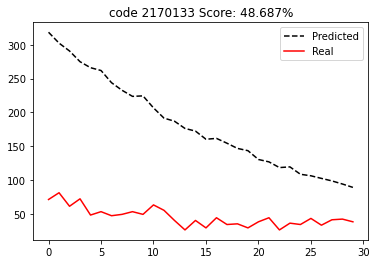

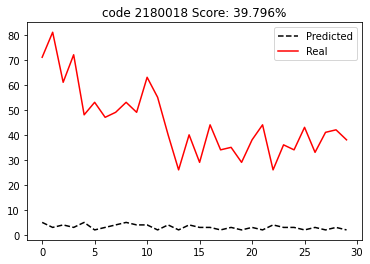

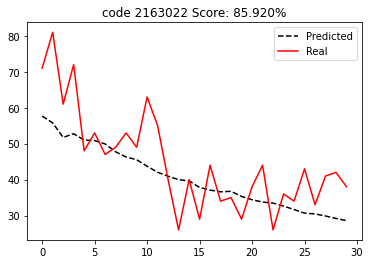

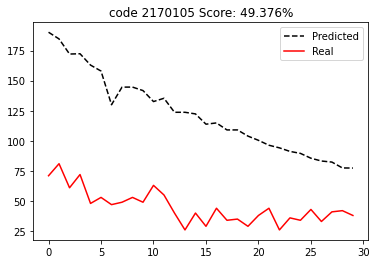

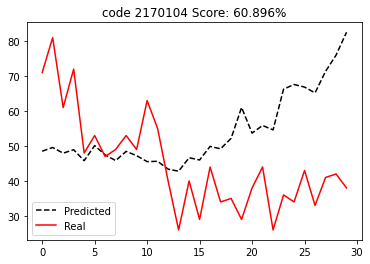

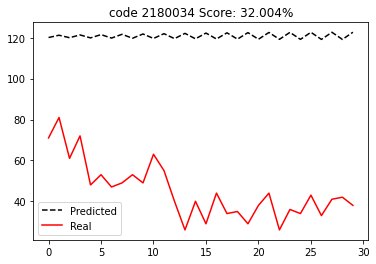

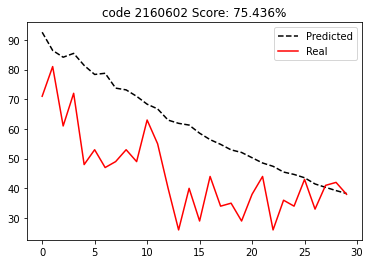

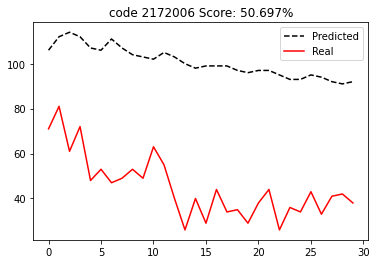

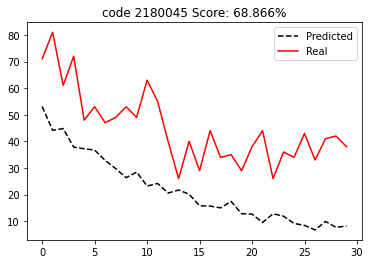

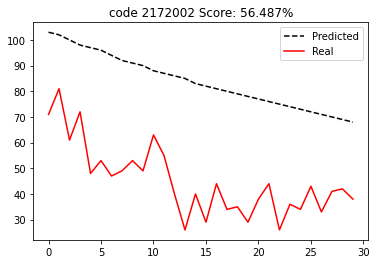

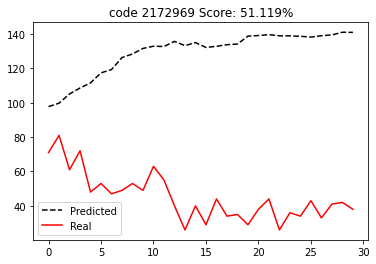

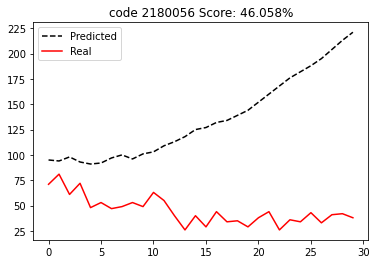

In [29]:
modelos = [i for i in names if i.split('.')[0].split('_')[-1]=='modelo']
predicciones = [i for i in names if len(i.split('.')[0]) == 7] #lista con code.csv
codes = []
scores = []
for p in predicciones:
    code = p.split('.')[0]
    codes.append(float(code))
    sample = pd.read_csv(FOLDER_PATH+p)
    sample_values = sample.values
    nota = calificacion(sample_values, real_muertes)    
    scores.append(nota)
    plt.figure()
    plt.title(f'code {code} Score: {nota:.3f}%')
    plt.plot(sample_values, c= 'k', linestyle='--',label = 'Predicted')
    plt.plot(real_muertes, c='r', label = 'Real')
    # plt.scatter(np.arange(len(real_data_values)), real_data_values, c='b', alpha = 0.6, label = 'real')
    plt.legend()
    plt.show()


In [18]:
notes = pd.DataFrame({'Code': codes, 'Score': scores}).sort_values(by = 'Score', ascending=False)
notes.loc[:,'Code'] = notes['Code'].astype(int)
notes

,Code,Score
7,2163022,85.920352
3,2170136,83.382380
2,2172022,76.569138
11,2160602,75.435913
13,2180045,68.866381
9,2170104,60.896407
14,2172002,56.486765
15,2172969,51.118888
12,2172006,50.696768
8,2170105,49.375885


<AxesSubplot:>

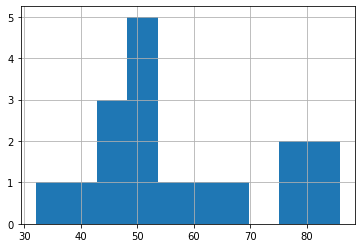

In [19]:
notes['Score'].hist()

In [20]:
notes.to_csv('../outputs/scores.csv', index=None)